<a href="https://colab.research.google.com/github/AnastasiaDvoynova/GameMarketAnalysis/blob/main/Game_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Подготовка данных к анализу

Откроем файл с данными и изучим общую информацию.


In [1]:
import pandas as pd
import numpy

file_obj = pd.read_csv('https://raw.githubusercontent.com/AnastasiaDvoynova/GameMarketAnalysis/main/Data/games.csv')
file_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
new_columns = []
# создаем новый список для заголовков
for column in file_obj.columns:
    new_columns.append(column.lower())
print(new_columns)
# в цикле проходимся по каждому заголовку, меняем его регистр на нижний
# и записываем в новый список
file_obj.set_axis(new_columns, axis = 'columns', inplace = True)
# заменяем названия столбцов на новые

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [3]:
#%load_ext autoreload
#%autoreload 2
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 245kB 5.6MB/s 
     |████████████████████████████████| 1.1MB 16.2MB/s 
     |████████████████████████████████| 3.2MB 24.4MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 122kB 45.0MB/s 
     |████████████████████████████████| 296kB 42.0MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=50056c15978f5cf623c106c64a1a9b91bc02fe5b1ec9eee670c36e5881c13efd
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=c4ee5c690c5cfba999513861f6fb634e733f52a7f2d4bbecce586afd4b087843
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: go

Посмотрим на отчёт по данным. 



1.   Отсутствующие значения занимают 12.1% от всего датасета.
2.   В данных нет дубликатов.
3.   В 269 записях отсутсуют данные о годе выпуска игры. Некоторые пропуски полностью случайны, эти данные можно восстановить как из названий некоторых игр, так и из источников интернета.
4.   В датасете большая представленноть игр жанра Action, Sports, Misc, Role-Playing, Shooter.
5.   В данных столбца critic_score и user_score отсутсвует 51,3% и 40,1% значений соотвественно. Достаточно большой процент отсутствующих значений, поэтому заполнение **nan** медианным или средним значением может вызвать неправильное отражение данных или их исказит. Можно предположить, что значения отсутвуют либо по случайности, либо потому, что игра была совсем непопулярна, поэтому рейтинга критиков и пользователей у нее нет. 
6.   В столбце user_score находится 2424 значения «tbd» или «to be determined», то есть будут определены. Эти значения неслучайные, так как либо значение калибруется или изменяется, либо данные о рейтинге появятся позже. Переведем эти значения в nan.

In [4]:
# импортируем библиотеку для создания отчета
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
report = file_obj.profile_report(
    sort="None", html={"style": {"full_width": True}}, progress_bar=False)
report

In [5]:
file_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Можно заметить, что **year_of_realease** стоит перевести в тип **int** для наглядности, прежде заменив значения NaN на 0, чтобы не возникло ошибки. 
А **user_score** перевести в тип **float**, так как оценка чаще всего вещественное число.

In [6]:
NaN_error = 0 
file_obj['year_of_release'] = file_obj['year_of_release'].fillna(NaN_error).astype(int)
file_obj['user_score'] = pd.to_numeric(file_obj['user_score'], errors='coerce')
file_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец **global_sales**.

In [7]:
global_sales = file_obj['na_sales'] + file_obj['eu_sales'] + \
                  file_obj['jp_sales'] + file_obj['other_sales']
file_obj.insert(loc=8, column='global_sales', value=global_sales)

# 2. Проведение исследовательского анализа данных

In [8]:
# Импортируем необходимые библиотеки для визуализации
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [9]:
year_game_count = file_obj[file_obj['year_of_release'] != 0].groupby(['year_of_release'])['name'].count()

In [10]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y = year_game_count, x = year_game_count.index)],
    layout_title_text="Количество релизов игр за весь период")
fig.show()

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [11]:
top_platforms = file_obj.groupby('platform')[['global_sales']].sum()\
  .sort_values('global_sales', ascending=False).head(5)

top_5_platform = top_platforms.reset_index().rename_axis(None, axis=1)
print(top_5_platform)

  platform  global_sales
0      PS2       1255.77
1     X360        971.42
2      PS3        939.65
3      Wii        907.51
4       DS        806.12


Text(0, 0.5, 'Сумма продаж')

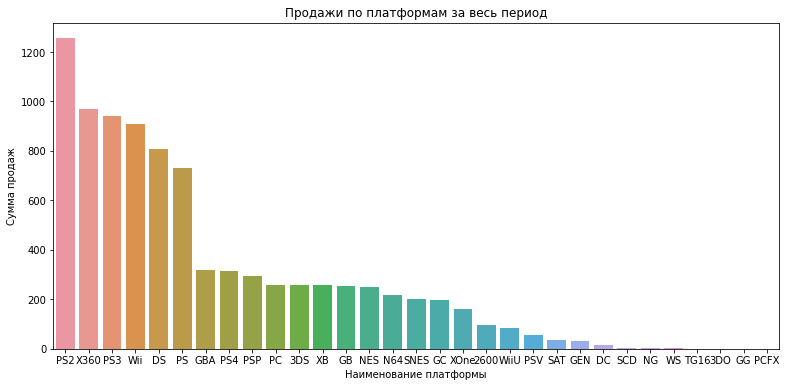

In [12]:
platform_sales = file_obj\
    .pivot_table(index='platform', values='global_sales', aggfunc='sum')\
    .sort_values(by='global_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x = platform_sales.index, y = platform_sales['global_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Наименование платформы")
plt.ylabel("Сумма продаж")


Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

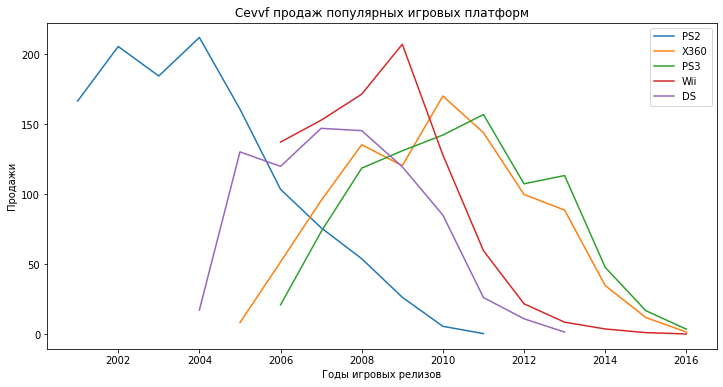

In [13]:

plt.figure(figsize=(12,6))
plt.title('Cevvf продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')
for i in list(top_5_platform['platform']):  
    platform_dynamisc = file_obj[(file_obj['platform'] == i) & (file_obj['year_of_release'] > 2000)]\
    .pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending=False)
    sns.lineplot(data=platform_dynamisc['global_sales'], label=i)
    plt.legend()


['PS2' 'DS' 'PS3' 'Wii' 'X360']


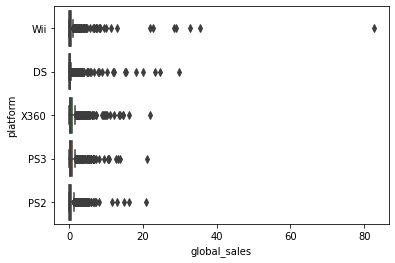

In [14]:

top_platforms = file_obj.platform.value_counts().sort_values(ascending = False).head(5).index.values
print(top_platforms)
sns.boxplot(y="platform", x="global_sales", data=file_obj[file_obj.platform.isin(top_platforms)], orient="h")

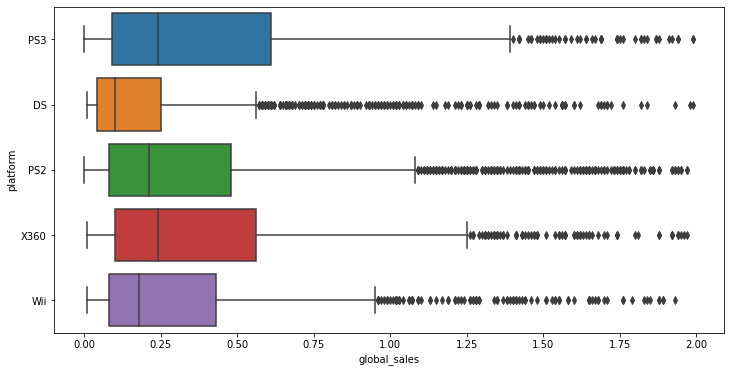

In [15]:
top_pplatforms = file_obj.platform.value_counts().sort_values(ascending = False).head(5).index.values
sv = file_obj[file_obj['global_sales'] < 2]
plt.figure(figsize=(12,6))
sns.boxplot(y="platform", x="global_sales", data=sv[sv.platform.isin(top_platforms)], orient="h")

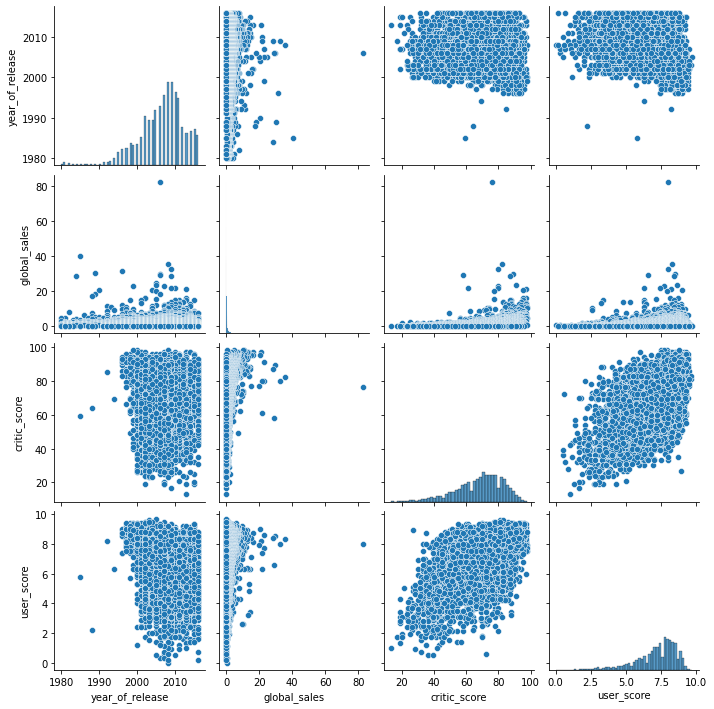

In [16]:
cols = ['year_of_release', 'genre', 'global_sales', 'critic_score', 'user_score', 'rating']
norm_year = file_obj[file_obj['year_of_release'] != 0]
sns_plot = sns.pairplot(norm_year[cols])


In [17]:
def correlation_platform_score(score, sales, platform):
  data = file_obj[file_obj['platform'] == platform]
  correlation = data[score].corr(data[sales])
  if 0.3 >= correlation >= 0.1:
    print('Корреляция между {} и {} на платформе {}'.format(score, sales, platform), ': Слабая')
  elif 0.5 >= correlation >= 0.3:
    print('Корреляция между {} и {} на платформе {}'.format(score, sales, platform), ': Умеренная')
  elif 0.7 >= correlation >= 0.5:
    print('Корреляция между {} и {} на платформе {}'.format(score, sales, platform), ': Высокая')
  elif 0.9 >= correlation >= 0.7:
    print('Корреляция между {} и {} на платформе {}'.format(score, sales, platform), ': Весьма высокая')
  elif 1 >= correlation >= 0.9:
    print('Корреляция между {} и {} на платформе {}'.format(score, sales, platform), ': Сильная')
for i in list(top_5_platform['platform']):
  correlation_platform_score('user_score', 'global_sales', str(i))
  correlation_platform_score('critic_score', 'global_sales', str(i))

Корреляция между user_score и global_sales на платформе PS2 : Слабая
Корреляция между critic_score и global_sales на платформе PS2 : Умеренная
Корреляция между user_score и global_sales на платформе X360 : Слабая
Корреляция между critic_score и global_sales на платформе X360 : Умеренная
Корреляция между user_score и global_sales на платформе PS3 : Слабая
Корреляция между critic_score и global_sales на платформе PS3 : Умеренная
Корреляция между user_score и global_sales на платформе Wii : Слабая
Корреляция между critic_score и global_sales на платформе Wii : Слабая
Корреляция между user_score и global_sales на платформе DS : Слабая
Корреляция между critic_score и global_sales на платформе DS : Слабая
